# Metody inteligencji obliczeniowej - Sprawozdanie 7

## Algorytmy genetyczne.
### Yuliya Zviarko, 23.04.2025

# Wprowadzenie
W przeciwie≈Ñstwie do klasycznych metod optymalizacyjnych, kt√≥re czƒôsto analizujƒÖ jedno rozwiƒÖzanie naraz i poruszajƒÖ siƒô po przestrzeni rozwiƒÖza≈Ñ przy pomocy wyznaczonych regu≈Ç, algorytmy genetyczne przeszukujƒÖ wiele rozwiƒÖza≈Ñ r√≥wnolegle w spos√≥b czƒô≈õciowo losowy. Dziƒôki temu sƒÖ bardziej odporne na lokalne minima i lepiej sprawdzajƒÖ siƒô w z≈Ço≈ºonych, wielowymiarowych przestrzeniach decyzyjnych.

Algorytmy genetyczne na≈õladujƒÖ naturalne procesy ‚Äì naturalny dob√≥r, krzy≈ºowanie i mutacje ‚Äì w celu ewolucji rozwiƒÖza≈Ñ problem√≥w. Ka≈ºde mo≈ºliwe rozwiƒÖzanie danego zagadnienia jest zapisywane jako "chromosom", a ich kolekcja tworzy populacjƒô. Pokolenie po pokoleniu rozwiƒÖzania "rywalizujƒÖ" ze sobƒÖ na podstawie tzw. funkcji przystosowania (fitness function), kt√≥ra okre≈õla, jak dobrze dane rozwiƒÖzanie radzi sobie z zadaniem postawionym.


# Zadanie 1

W zadaniu pierwszym nale≈ºa≈Ço zaproponowaƒá swojƒÖ implementacjƒô algorytmu genetycznego w celu znalezienia maksimum funkcji
$$
f(x) = \cos(80x + 0.3) + 3x^{-0.9} - 2
$$  

w przedziale $[0.01, 1]$.


Dla $x = 0$, choƒá nie powinno byƒá u≈ºywane w zadaniu, przyjmujemy $f(x) = 0$.


Celem zadania by≈Ço por√≥wnanie dzia≈Çania algorytmu w r√≥≈ºnych wariantach:
* Dla kodowania w naturalnym kodzie **binarnym** i w kodzie **Graya**
* Dla szansy mutacji wynoszƒÖcej **0, 0.1, 0.5 i 1.0**
* Dla selekcji **ruletkowej** i dla selekcji **progowej**. W selekcji progowej dzielimy populacjƒô na dwie grupy: na $\gamma\%$ najlepszych i na pozosta≈Çych. Osobniki w grupie $\gamma\%$ najlepszych majƒÖ r√≥wnƒÖ szansƒô na reprodukcjƒô, pozosta≈Çe majƒÖ zerowƒÖ szansƒô na reprodukcjƒô. Wyniki na≈Çe≈ºalo sprawdziƒá dla $\gamma = 30$ i $\gamma = 60$.


Za ka≈ºdym razem nale≈ºa≈Ço podaƒá ≈õrednie wyniki dla 10 wywo≈Ça≈Ñ algorytmu i przedstawiƒá przyk≈Çadowe przebiegi algorytmu na wykresach (tylko dla jednego z wywo≈Ça≈Ñ).

Na samym poczƒÖtku sprawdzi≈Çam w WolframAlpha, jak wyglƒÖda wykres zadanej funkcji. Jest to kawa≈Çek hiperboli dla dodatnich osi $x$ i $y$.

Zatem maksimum tej funkcji w badanym przedziale $[0.01, 1]$ le≈ºy w punkcie $x = 0.01$, a jego warto≈õƒá wynosi oko≈Ço 188.287.

Skoro wiemy ju≈º, jakiego wyniku mniej wiƒôcej siƒô spodziewaƒá, ≈Çatwiej bƒôdzie nam oszacowaƒá wyniki w trakcie badania.

wykres01.png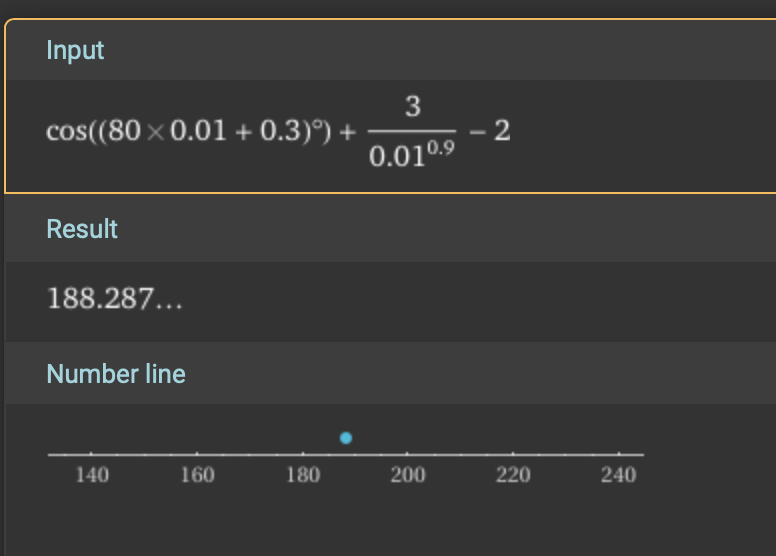

Implementacja rozpoczƒô≈Ça siƒô od konwersji chromosom√≥w, czyli ciƒÖg√≥w bit√≥w (potencjalnych rozwiƒÖza≈Ñ), miƒôdzy kodowaniem binarnym a kodem Gray‚Äôa.


Je≈ºeli preferowany jest binary_to_gray (kod Gray‚Äôa), pierwszy bit pozostaje bez zmian, a ka≈ºdy kolejny jest obliczany jako XOR (czyli ^) pomiƒôdzy bie≈ºƒÖcym a poprzednim bitem w zapisie binarnym.


Sytuacja jest analogiczna w przypadku gray_to_binary (kod binarny), gdzie wej≈õciem jest zapis w kodzie Gray‚Äôa. Operacje sƒÖ identyczne:

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def binary_to_gray(binary):
    gray = [binary[0]]
    for i in range(1, len(binary)):
        gray.append(binary[i] ^ binary[i - 1])
    return gray

def gray_to_binary(gray):
    binary = [gray[0]]
    for i in range(1, len(gray)):
        binary.append(binary[i - 1] ^ gray[i])
    return binary

Na poczƒÖtku tworzona jest populacja losowych rozwiƒÖza≈Ñ, kt√≥ra stanowi punkt wyj≈õcia do dalszej ewolucji.
W tym celu zdefiniowa≈Çam klasƒô Solution ‚Äì nasze pojedyncze rozwiƒÖzanie.

* Kiedy tworzy siƒô nowy obiekt tej klasy, metoda __init__ generuje losowe rozwiƒÖzanie (geny) o d≈Çugo≈õci 16 bit√≥w.

* Ka≈ºde rozwiƒÖzanie jest oceniane pod kƒÖtem jego jako≈õci. W tym celu zdefiniowa jest metoda **decode**, kt√≥ra dekoduje nasze geny (w kodzie Gray‚Äôa lub binarnym) na liczbƒô rzeczywistƒÖ z zakresu $[0.01, 1]$.

* Metoda **fitness** pomaga w ocenie jako≈õci rozwiƒÖzania. Stosujemy w niej zaproponowanƒÖ funkcjƒô:
$$
f(x) = \cos(80x + 0.3) + 3x^{-0.9} - 2
$$  

* Metoda **crossover** ‚Äì miesza geny w losowym punkcie dw√≥ch po≈ÇƒÖczonych rozwiƒÖza≈Ñ. Dwa wybrane osobniki wymieniajƒÖ fragmenty swojego ‚Äûgenotypu‚Äù, tworzƒÖc nowe kombinacje cech.

* Metoda **mutate** ‚Äì zmienia losowo niekt√≥re bity w zale≈ºno≈õci od podanego mutation_rate. W tym miejscu bƒôdziemy podstawiaƒá zaproponowane w tre≈õci zadania warto≈õci 0, 0.1, 0.5 i 1.0. Losowe zmiany w niekt√≥rych genach wprowadzajƒÖ r√≥≈ºnorodno≈õƒá i przeciwdzia≈ÇajƒÖ przedwczesnemu zbieganiu siƒô populacji.

Ca≈Çy proces powtarza siƒô przez wiele pokole≈Ñ, a populacja z czasem ‚Äûuczy siƒô‚Äù, jak znajdowaƒá coraz lepsze rozwiƒÖzania:

In [ ]:
class Solution:
    def __init__(self, gene_length=16, randomize=False, use_gray=False):
        self.gene_length = gene_length
        self.use_gray = use_gray
        if randomize:
            self.genes = [random.randint(0, 1) for _ in range(gene_length)]
        else:
            self.genes = [0] * gene_length

    def decode(self):
        genes = self.genes
        if self.use_gray:
            genes = gray_to_binary(genes)
        value = int("".join(str(bit) for bit in genes), 2)
        x = 0.01 + (value / (2 ** self.gene_length - 1)) * (1 - 0.01)
        return x

    def fitness(self):
        x = self.decode()
        if x == 0:
            return 0
        return math.cos(80 * x + 0.3) + 3 * (x ** -0.9) - 2

    def crossover(self, other):
        point = random.randint(1, self.gene_length - 1)
        child = Solution(self.gene_length, use_gray=self.use_gray)
        child.genes = self.genes[:point] + other.genes[point:]
        return child

    def mutate(self, mutation_rate):
        for i in range(self.gene_length):
            if random.random() < mutation_rate:
                self.genes[i] ^= 1

Lepsze rozwiƒÖzania majƒÖ wiƒôksze szanse na ‚Äûrozmno≈ºenie siƒô‚Äù w kolejnej generacji. W tym celu mamy dwa rodzaje selekcji, kt√≥re bƒôdƒÖ osobno testowane: selekcjƒô **ruletkowƒÖ** oraz selekcjƒô **progowƒÖ**.

Selekcja ruletkowa jest metodƒÖ stochastycznƒÖ, w kt√≥rej prawdopodobie≈Ñstwo wyboru osobnika jest proporcjonalne do jego jako≈õci (fitness). Metoda ta jest inspirowana rzeczywistymi ruletkami, ale posiada istotne r√≥≈ºnice w por√≥wnaniu do nich. Jak wiadomo z film√≥w o kasynach i hazardzie, ruletki majƒÖ sloty o jednakowej wielko≈õci. Oznacza to, ≈ºe wszystkie sloty majƒÖ takie samo prawdopodobie≈Ñstwo bycia wybranymi. Zamiast tego, w implementacji selekcji ruletkowej stosuje siƒô wersjƒô wa≈ºonƒÖ. Im wiƒôksza jako≈õƒá osobnika, tym wiƒôksza szansa, ≈ºe zostanie on wybrany do rozmno≈ºenia:





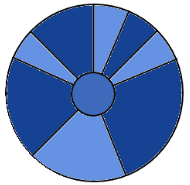

Pierwszym sk≈Çadnikiem metody selekcji ruletkowej jest zatem to, ≈ºe jako≈õƒá osobnika jest proporcjonalna do prawdopodobie≈Ñstwa jego wyboru.



Jednak to nie wystarcza. Poniewa≈º populacja sk≈Çada siƒô z *n* osobnik√≥w, suma prawdopodobie≈Ñstw $\sum_{i=1}^n p_i $ ich wyboru musi wynosiƒá 1. W zwiƒÖzku z tym musimy r√≥wnie≈º znormalizowaƒá wszystkie warto≈õci prawdopodobie≈Ñstw do przedzia≈Çu $[0, 1]$.


Dla threshold_selection(selekcja progowa) najpierw osobniki sƒÖ sortowane malejƒÖco wed≈Çug fitness,
nastƒôpnie wybierana jest tylko g√≥rna czƒô≈õƒá populacji ‚Äì np. 30% najlepszych (okre≈õlane przez pr√≥g gamma).
Losowanie nastƒôpuje tylko w≈õr√≥d tej elity, reszta jest odrzucana.

Wedlug tre≈õci zadania w danej selekcji dzielimy populacjƒô na dwie grupy: na  ùõæ%  najlepszych i na pozosta≈Çych. Osobniki w grupie  ùõæ%  najlepszych majƒÖ r√≥wnƒÖ szansƒô na reprodukcjƒô, pozosta≈Çe majƒÖ zerowƒÖ szansƒô na reprodukcjƒô. Wyniki bƒôdziemy sprawdzaƒá dla  ùõæ=30  i  ùõæ=60.

In [ ]:
def roulette_selection(population, fitnesses):
    total_fitness = sum(fitnesses)
    if total_fitness == 0:
        return random.choices(population, k=2)
    selection_probs = [f / total_fitness for f in fitnesses]
    return random.choices(population, weights=selection_probs, k=2)

def threshold_selection(population, fitnesses, gamma):
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]
    cutoff = max(2, int(len(population) * gamma / 100))
    selected = sorted_population[:cutoff]
    return random.choices(selected, k=2)


Na zako≈Ñczenie przedstawiona zostaje g≈Ç√≥wna funkcja realizujƒÖca algorytm genetyczny. Tworzy ona poczƒÖtkowƒÖ populacjƒô rozwiƒÖza≈Ñ zakodowanych binarnie lub w kodzie Graya (w zale≈ºno≈õci od parametru use_gray).

W ka≈ºdej generacji obliczane sƒÖ warto≈õci przystosowania (fitness), a nastƒôpnie ‚Äì poprzez selekcjƒô (ruletkowƒÖ/progowƒÖ), krzy≈ºowanie i mutacjƒô (mutation_rate) ‚Äì tworzona jest nowa populacja.


---

Przeprowadzi≈Çam seriƒô eksperyment√≥w dla r√≥≈ºnych konfiguracji algorytmu:

Przetestowa≈Çam dwa poziomy parametru gamma (30 i 60), wp≈ÇywajƒÖcego na selekcjƒô progowƒÖ. Dla ka≈ºdej kombinacji sposobu kodowania (binarny/Gray), metody selekcji (roulette/threshold) oraz poziomu mutacji (0.0, 0.1, 0.5, 1.0), algorytm uruchamiano 10 razy. Z ka≈ºdego przebiegu zosta≈Ç zapisany najlepszy wynik (best_fit), a nastƒôpnie wyliczona ≈õredniƒÖ (avg_fit) i maksymalnƒÖ (max_fit) warto≈õƒá przystosowania.

In [ ]:
import matplotlib.pyplot as plt

print("start, gamma = 30")

plotted = 0

# Gamma = 30
for use_gray in codings:
    for selection_method in selections:
        for mutation_rate in mutations:
            fitnesses = []
            avg_sample = []
            bests_local_sample = []
            bests_global_sample = []
            for run in range(10):
                best_fit, avg_history, best_local_history = genetic_algorithm(
                    use_gray, mutation_rate, selection_method, gamma=30
                )
                fitnesses.append(best_fit)

                if run == 0:
                    avg_sample = avg_history
                    bests_local_sample = best_local_history
                    best_so_far = float('-inf')
                    for val in best_local_history:
                        best_so_far = max(best_so_far, val)
                        bests_global_sample.append(best_so_far)
            avg_fit = sum(fitnesses) / len(fitnesses)
            max_fit = max(fitnesses)
            print(f"Encoding: {'Gray' if use_gray else 'Binary'}, "
                  f"Selection: {selection_method}, "
                  f"Mutation: {mutation_rate} -> "
                  f"Avg fitness: {avg_fit:.4f}, Max fitness: {max_fit:.4f}")
            if plotted < 2:
                plt.plot(bests_local_sample)
                plt.title("Fitness najlepszego osobnika w ka≈ºdej iteracji")
                plt.xlabel("Pokolenie")
                plt.ylabel("Fitness (local)")
                plt.grid(True)
                plt.show()
                plotted += 1

print("\nstart, gamma = 60")
for use_gray in codings:
    for selection_method in selections:
        for mutation_rate in mutations:
            fitnesses = []
            for run in range(10):
                best_fit, _, _ = genetic_algorithm(
                    use_gray, mutation_rate, selection_method, gamma=60
                )
                fitnesses.append(best_fit)
            avg_fit = sum(fitnesses) / len(fitnesses)
            max_fit = max(fitnesses)
            print(f"Encoding: {'Gray' if use_gray else 'Binary'}, "
                  f"Selection: {selection_method}, "
                  f"Mutation: {mutation_rate} -> "
                  f"Avg fitness: {avg_fit:.4f}, Max fitness: {max_fit:.4f}")

start, gamma = 30
Encoding: Binary, Selection: roulette, Mutation: 0.0 -> Avg fitness: 182.3840, Max fitness: 187.7408


Encoding: Binary, Selection: roulette, Mutation: 0.1 -> Avg fitness: 187.7408, Max fitness: 187.7408


Encoding: Binary, Selection: roulette, Mutation: 0.5 -> Avg fitness: 181.3891, Max fitness: 186.9688
Encoding: Binary, Selection: roulette, Mutation: 1.0 -> Avg fitness: 143.8753, Max fitness: 187.7408
Encoding: Binary, Selection: threshold, Mutation: 0.0 -> Avg fitness: 164.4660, Max fitness: 187.7408
Encoding: Binary, Selection: threshold, Mutation: 0.1 -> Avg fitness: 187.7408, Max fitness: 187.7408
Encoding: Binary, Selection: threshold, Mutation: 0.5 -> Avg fitness: 181.4445, Max fitness: 186.9688
Encoding: Binary, Selection: threshold, Mutation: 1.0 -> Avg fitness: 79.9951, Max fitness: 138.9184
Encoding: Gray, Selection: roulette, Mutation: 0.0 -> Avg fitness: 150.0197, Max fitness: 187.7408
Encoding: Gray, Selection: roulette, Mutation: 0.1 -> Avg fitness: 187.6892, Max fitness: 187.7408
Encoding: Gray, Selection: roulette, Mutation: 0.5 -> Avg fitness: 181.7104, Max fitness: 186.9688
Encoding: Gray, Selection: roulette, Mutation: 1.0 -> Avg fitness: 124.6069, Max fitness: 186.

W wiƒôkszo≈õci przypadk√≥w algorytm genetyczny osiƒÖga wyniki bliskie oczekiwanemu maksimum funkcji celu, wynoszƒÖcemu oko≈Ço 188,287.

Na podstawie wygenerowanych wykres√≥w mo≈ºna zauwa≈ºyƒá, ≈ºe po oko≈Ço 10 pokoleniach warto≈õƒá funkcji przystosowania praktycznie przestaje siƒô poprawiaƒá. Oznacza to, ≈ºe populacja bardzo szybko znalaz≈Ça dobre rozwiƒÖzania i nie eksplorowa≈Ça ju≈º dalej przestrzeni rozwiƒÖza≈Ñ.


Najlepsze rezultaty uzyskiwane sƒÖ przy poziomie mutacji r√≥wnym 0.1, niezale≈ºnie od zastosowanego rodzaju kodowania czy metody selekcji. Zwiƒôkszenie warto≈õci mutacji, np. do 0.5 lub 1.0, prowadzi do pogorszenia jako≈õci wynik√≥w.


Metoda selekcji ruletkowej (roulette selection) okazuje siƒô bardziej stabilna przy wy≈ºszych warto≈õciach mutacji, podczas gdy selekcja progowa (threshold selection) osiƒÖga najlepsze wyniki przy optymalnie dobranej warto≈õci mutacji (szczeg√≥lnie przy 0.1), jednak wykazuje wiƒôkszƒÖ wra≈ºliwo≈õƒá na jej zmiany.
Nie chcemy utraciƒá r√≥≈ºnorodno≈õci w populacji, poniewa≈º mo≈ºe to prowadziƒá do utkniƒôcia w minimum lokalnym. Z tego wzglƒôdu sk≈Çania≈Çabym siƒô w stronƒô selekcji ruletkowej, kt√≥ra uwzglƒôdnia ca≈ÇƒÖ przestrze≈Ñ rozwiƒÖza≈Ñ: ka≈ºdy osobnik ma szansƒô na wyb√≥r proporcjonalnie do swojego dopasowania.


W przypadku kodowania binarnego, np. dla liczb 15 (01111) i 16 (10000), wystƒôpuje du≈ºa odleg≈Ço≈õƒá Hammingowa wynoszƒÖca 5. Aby algorytm genetyczny przeszed≈Ç z reprezentacji 15 do 16, musia≈Çby zmieniƒá wszystkie bity jednocze≈õnie. Taki problem, zwany Hamming cliffs[https://dilvanlab.github.io/old/dilvan/thesis.phd/genetic.html], stanowi trudno≈õƒá dla algorytmu, poniewa≈º zar√≥wno mutacja, jak i krzy≈ºowanie nie mogƒÖ ≈Çatwo pokonaƒá tych du≈ºych zmian.

Z tego wzglƒôdu kodowanie Gray‚Äôa mo≈ºe byƒá korzystniejsze w trudniejszych warunkach, np. przy wiƒôkszych warto≈õciach mutacji, poniewa≈º jest mniej podatne na powy≈ºej opisany problem. W tym przypadku niewielkie zmiany w genotypie prowadzƒÖ do niewielkich zmian w fenotypie, co sprawia, ≈ºe algorytm dzia≈Ça bardziej stabilnie i efektywnie.



# Zadanie 2

city.png

---

W mie≈õcie, reprezentowanym za pomocƒÖ kwadratowej siatki, operujemy sieciƒÖ pizzerii. Ich lokalizacje znajdujƒÖ siƒô w kwadratach o pozycjach (1,1), (2,6), (5,4), (7,1), albo jak pokazano na obrazku powy≈ºej.


Zyski sieci zale≈ºƒÖ od bud≈ºetu wy≈Ço≈ºonego na cztery pizzerie ($B_1$, $B_2$, $B_3$, $B_4$), gdzie ka≈ºdy bud≈ºet jest w zakresie od **0 do 400** (nie mo≈ºe wyj≈õƒá poza te warto≈õci). Zysk jest liczony w nastƒôpujƒÖcy spos√≥b:

$$
Z = \sum_{i=0}^8 \sum_{j=0}^8 \frac{z_{i,j}^1 + z_{i,j}^2 + z_{i,j}^3 + z_{i,j}^4}{4} - (B_1+B_2+B_3+B_4)^{1.15}
$$

Gdzie $z_{i,j}^k$ jest dochodem $k$-tej pizzerii na polu $(i,j)$. Innymi s≈Çowy, sumujemy **≈õrednie zyski** z danego pola dla wszystkich pizzerii i odejmujemy od tego skorygowanƒÖ (potƒôgowanƒÖ) sumƒô bud≈ºet√≥w ‚Äî ze wzglƒôdu na konieczno≈õƒá rozbudowy lokali, wiƒôksze trudno≈õci w utrzymaniu itp.

Zysk $k$-tej pizzerii na polu $(i,j)$ liczymy natomiast nastƒôpujƒÖco:

Najpierw liczymy $d$, czyli odleg≈Ço≈õƒá taks√≥wkarskƒÖ (taxicab, Manhattan Distance) miƒôdzy pizzeriƒÖ a tym polem.

- Je≈ºeli $d$ jest **mniejsza** ni≈º 2:

$$
z = 1.3 \cdot \frac{B}{0.5d + 4}
$$

- Je≈ºeli $d$ jest **wiƒôksza lub r√≥wna** 2:

$$
z = \frac{B}{0.5d + 4}
$$

---

Celem zadania drugiego by≈Ço zaprojektowanie algorytmu genetycznego, kt√≥rego zadaniem jest maksymalizacja warto≈õci funkcji $Z(B_1, B_2, B_3, B_4)$.

Algorytm mia≈Ç zostaƒá przetestowany w 10 niezale≈ºnych uruchomieniach.

W ramach zadania nale≈ºa≈Ço samodzielnie dobraƒá:
* spos√≥b kodowania osobnik√≥w (rzeczywistoliczbowe, ca≈Çkowitoliczbowe lub binarne),
* metodƒô mutacji i selekcji,
* oraz przeprowadziƒá eksperymenty parametryczne, by znale≈∫ƒá najlepsze ustawienia algorytmu.



W klasie **Solution2** ka≈ºdy osobnik reprezentuje strategiƒô alokacji bud≈ºetu pomiƒôdzy cztery pizzerie. Genotyp to lista czterech liczb ca≈Çkowitych, okre≈õlajƒÖcych bud≈ºet ka≈ºdej pizzerii z przedzia≈Çu $[0, 400]$. W odr√≥≈ºnieniu od zadania 1, zastosowano tutaj bezpo≈õrednie kodowanie **ca≈Çkowitoliczbowe**, zamiast kodu *binarnego* czy *Graya*.

Funkcja **przystosowania** oblicza warto≈õƒá funkcji $Z$, czyli:
- Dla ka≈ºdego pola $(i,j)$ w siatce $8 \times 8$ obliczany jest zysk od ka≈ºdej z pizzerii na podstawie odleg≈Ço≈õci Manhattan.
- Je≈õli pizzeria znajduje siƒô blisko pola (d < 2), jej wp≈Çyw na zysk jest wzmocniony przez wsp√≥≈Çczynnik 1.3.
- Nastƒôpnie, dla ka≈ºdego pola liczony jest ≈õredni zysk z czterech pizzerii.
- ≈ÅƒÖczny zysk z ca≈Çej siatki jest pomniejszany o karƒô za sumaryczny bud≈ºet podniesionƒÖ do potƒôgi 1.15.


**Krzy≈ºowanie** osobnik√≥w realizowane jest poprzez wyb√≥r losowego punktu podzia≈Çu, po czym tworzony jest potomek z≈Ço≈ºony z gen√≥w dw√≥ch rodzic√≥w. Mutacja polega na losowej zmianie warto≈õci pojedynczego genu z ustalonym prawdopodobie≈Ñstwem (0.2) na nowƒÖ warto≈õƒá z zakresu [0, 400].

Ka≈ºdy gen (czyli warto≈õƒá bud≈ºetu dla jednej pizzerii) mo≈ºe z pewnym prawdopodobie≈Ñstwem (mutation_chance) zostaƒá zastƒÖpiony losowƒÖ liczbƒÖ z zakresu [0, 400].


Do wyboru rodzic√≥w zastosowano selekcjƒô **ruletkowƒÖ**, gdzie szansa wyboru jest proporcjonalna do przystosowania osobnika. W przypadku, gdy suma przystosowa≈Ñ w populacji by≈Çaby niedodatnia, rodzice wybierani sƒÖ losowo.


Dla testowania algorytmu u≈ºy≈Çam nastƒôpujƒÖce parametry:
- Rozmiar populacji: 100
- Liczba iteracji (epok): 1000
- Prawdopodobie≈Ñstwo mutacji: 0.2


Logowanie wynik√≥w odbywa≈Ço siƒô co 100 epok, prezentujƒÖc:
- ≈õrednia warto≈õƒá przystosowania w populacji,
- najlepszy osobnik w danej epoce,
- najlepszy osobnik w ca≈Çej historii.


Po zako≈Ñczeniu ewolucji wypisywany by≈Ç najlepszy znaleziony osobnik oraz jego ko≈Ñcowa warto≈õƒá funkcji przystosowania.


In [ ]:
import random
import numpy as np

class Solution2:
    def __init__(self):
        self.pizzerias = [(1, 1), (2, 6), (5, 4), (7, 1)]
        self.B = [random.randint(0, 400) for _ in range(4)]
        self.genes = self.B

    def get_adaptation(self):
        total_profit = 0
        for i in range(8):
            for j in range(8):
                avg_profit = 0
                for k in range(4):
                    x_pizzeria, y_pizzeria = self.pizzerias[k]
                    d = abs(x_pizzeria - i) + abs(y_pizzeria - j)
                    B_k = self.B[k]
                    if d < 2:
                        z = 1.3 * B_k / (0.5 * d + 4)
                    else:
                        z = B_k / (0.5 * d + 4)
                    avg_profit += z
                avg_profit /= 4
                total_profit += avg_profit

        total_budget = sum(self.B)
        adaptation = total_profit - (total_budget ** 1.15)
        return adaptation


    def crossover(self, other_solution):
        crossover_point = np.random.randint(1, 4)
        new_solution = Solution2()
        new_solution.B[0:crossover_point] = self.B[0:crossover_point]
        new_solution.B[crossover_point:] = other_solution.B[crossover_point:]
        return new_solution

    def mutation(self, mutation_chance):
        for i in range(4):
            if random.random() < mutation_chance:
                self.B[i] = random.randint(0, 400)

def selection(population):
    weights = [p.get_adaptation() for p in population]
    total_weight = sum(weights)

    if total_weight <= 0:
        # Je≈õli suma wag jest zerowa lub ujemna, wybieramy losowo dw√≥ch rodzic√≥w
        return random.choices(population, k=2)

    # Inaczej wybieramy rodzic√≥w na podstawie wag
    return random.choices(population, k=2, weights=weights)


def evolution(population, mutation_chance):
    new_population = []
    for _ in range(len(population)):
        parent1, parent2 = selection(population)
        child = parent1.crossover(parent2)
        child.mutation(mutation_chance)
        new_population.append(child)
    return new_population

population_size = 100
iterations = 1000
mutation_chance = 0.2

population = [Solution2() for _ in range(population_size)]

best_solution = Solution2()
best_solution_adaptation = 0
best_iteration_found = 0

for iteration in range(iterations):
    adaptations = [p.get_adaptation() for p in population]

    local_best_solution = population[adaptations.index(max(adaptations))]
    if local_best_solution.get_adaptation() > best_solution_adaptation:
        best_solution = local_best_solution
        best_solution_adaptation = local_best_solution.get_adaptation()
        best_iteration_found = iteration

    if iteration % 100 == 0:
        print(f"Epoch: {iteration}; avg adaptation: {sum(adaptations) / len(adaptations)}; best adaptation: {max(adaptations)} best adaptation ever: {best_solution_adaptation} from iteration {best_iteration_found}")

    population = evolution(population, mutation_chance)

adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()

print('---')
print(f'Best solution: B1: {best_solution.B[0]}, B2: {best_solution.B[1]}, B3: {best_solution.B[2]}, B4: {best_solution.B[3]}')
print(f'Found in iteration: {best_iteration_found}')
print(f'Cost: {best_solution_adaptation}')


Epoch: 0; avg adaptation: -114.59746107137927; best adaptation: 77.4849428806865 best adaptation ever: 77.4849428806865 from iteration 0
Epoch: 100; avg adaptation: -127.50754142990283; best adaptation: 84.91803655849367 best adaptation ever: 120.5303096858978 from iteration 51
Epoch: 200; avg adaptation: -98.36107024964296; best adaptation: 94.1609969502199 best adaptation ever: 120.5303096858978 from iteration 51
Epoch: 300; avg adaptation: -131.94444915092893; best adaptation: 93.9278804899277 best adaptation ever: 120.5303096858978 from iteration 51
Epoch: 400; avg adaptation: -112.42252599361518; best adaptation: 99.36131320727418 best adaptation ever: 120.5303096858978 from iteration 51
Epoch: 500; avg adaptation: -123.21592811138792; best adaptation: 77.07694274802395 best adaptation ever: 120.5303096858978 from iteration 51
Epoch: 600; avg adaptation: -93.80211173602478; best adaptation: 99.77253079818604 best adaptation ever: 120.5303096858978 from iteration 51
Epoch: 700; avg

W ka≈ºdej iteracji otrzymywa≈Çam ujemne ≈õrednie warto≈õci adaptacji - w wiƒôkszo≈õci przypadk√≥w osobniki w populacji generowa≈Çy zbyt wysokie koszty w stosunku do uzyskanych zysk√≥w.

Ju≈º na **51** iteracji, w trakcie test√≥w, uda≈Ço siƒô osiƒÖgnƒÖƒá dobre rozwiƒÖzanie o warto≈õci ~120,53. Pod koniec, na **721** iteracji, warto≈õƒá ta poprawi≈Ça siƒô do 121,98. Oznacza to, ≈ºe wybrane kodowanie oraz zastosowane metody selekcji, mutacji i krzy≈ºowania by≈Çy wystarczajƒÖco skuteczne, by kierowaƒá populacjƒô w stronƒô coraz lepszych rozwiƒÖza≈Ñ.
D≈Çuga stagnacja obserwowana podczas test√≥w dla 51 iteracji, mo≈ºe ≈õwiadczyƒá o osiƒÖgniƒôciu lokalnego optimum lub wskazywaƒá na potrzebƒô dostosowania parametr√≥w algorytmu, by wydostaƒá siƒô z tego optimum i zbadaƒá inne obszary przestrzeni rozwiƒÖza≈Ñ.

Najlepsze rozwiƒÖzanie osiƒÖgniƒôto, inwestujƒÖc znacznƒÖ czƒô≈õƒá bud≈ºetu w jednƒÖ pizzeriƒô (B3 = 357), podczas gdy pozosta≈Çe otrzyma≈Çy niewielkie ≈õrodki. Algorytm pom√≥g≈Ç wyznaczyƒá, ≈ºe taka strategia przynosi najwiƒôkszy zysk.

In [3]:
for run in range(10):
    print(f"--- Run {run + 1} ---")
    population = [Solution2() for _ in range(population_size)]
    best_solution = Solution2()
    best_solution_adaptation = 0
    best_iteration_found = 0

    for iteration in range(iterations):
        adaptations = [p.get_adaptation() for p in population]

        local_best_solution = population[adaptations.index(max(adaptations))]
        if local_best_solution.get_adaptation() > best_solution_adaptation:
            best_solution = local_best_solution
            best_solution_adaptation = local_best_solution.get_adaptation()
            best_iteration_found = iteration

        population = evolution(population, mutation_chance)

    print(f'Best solution: B1: {best_solution.B[0]}, B2: {best_solution.B[1]}, B3: {best_solution.B[2]}, B4: {best_solution.B[3]}')
    print(f'Found in iteration: {best_iteration_found}')
    print(f'Cost: {best_solution_adaptation}')


--- Run 1 ---
Best solution: B1: 7, B2: 20, B3: 302, B4: 3
Found in iteration: 842
Cost: 121.22338272319678
--- Run 2 ---
Best solution: B1: 4, B2: 18, B3: 362, B4: 2
Found in iteration: 221
Cost: 121.86478940987388
--- Run 3 ---
Best solution: B1: 3, B2: 20, B3: 297, B4: 0
Found in iteration: 616
Cost: 122.71388476446748
--- Run 4 ---
Best solution: B1: 4, B2: 9, B3: 313, B4: 4
Found in iteration: 464
Cost: 122.81410533843916
--- Run 5 ---
Best solution: B1: 2, B2: 17, B3: 325, B4: 13
Found in iteration: 906
Cost: 119.35413075421934
--- Run 6 ---
Best solution: B1: 1, B2: 5, B3: 354, B4: 5
Found in iteration: 513
Cost: 123.68431013351835
--- Run 7 ---
Best solution: B1: 4, B2: 0, B3: 290, B4: 7
Found in iteration: 445
Cost: 121.66709908288078
--- Run 8 ---
Best solution: B1: 12, B2: 5, B3: 331, B4: 5
Found in iteration: 66
Cost: 121.57331305773164
--- Run 9 ---
Best solution: B1: 5, B2: 12, B3: 341, B4: 0
Found in iteration: 231
Cost: 123.80597124077462
--- Run 10 ---
Best solution: B

In [4]:
import numpy as np

costs = [121.22, 121.86, 122.71, 122.81, 119.35, 123.68, 121.67, 121.57, 123.81, 123.00]
mean = np.mean(costs)
std_dev = np.std(costs)

print(f"≈öredni koszt: {mean:.2f}")
print(f"Odchylenie standardowe: {std_dev:.2f}")

≈öredni koszt: 122.17
Odchylenie standardowe: 1.26


Algorytm zosta≈Ç r√≥wnie≈º przetestowany w 10 niezale≈ºnych przebiegach. Jak widaƒá, dzia≈Ça bardzo stabilnie, co potwierdza niskie odchylenie standardowe uzyskanych wynik√≥w. Koszty rozwiƒÖza≈Ñ sƒÖ sp√≥jne we wszystkich uruchomieniach, a populacja szybko koncentruje siƒô wok√≥≈Ç jednej klasy rozwiƒÖza≈Ñ.

Warto zauwa≈ºyƒá, ≈ºe najwiƒôkszy bud≈ºet zawsze trafia do tej samej pizzerii (B3), zatem jej lokalizacja ma dominujƒÖcy wp≈Çyw na ko≈Ñcowy wynik. Mo≈ºna dalej zbadaƒá ten efekt oraz sprawdziƒá, jak zmieni siƒô wynik po wprowadzeniu dodatkowych ogranicze≈Ñ lub przy innych warto≈õciach mutacji.

W przysz≈Ço≈õci mo≈ºna r√≥wnie≈º przetestowaƒá inne zestawy parametr√≥w, np. dotyczƒÖce selekcji, krzy≈ºowania czy wielko≈õci populacji, aby upewniƒá siƒô, ≈ºe uzyskane rozwiƒÖzanie jest rzeczywi≈õcie optymalne, a nie jedynie lokalnie najlepsze.